In [1]:
pip install opencv-python==4.1.1

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement opencv-python==4.1.1 (from versions: 3.4.0.14, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74)
ERROR: No matching distribution found for opencv-python==4.1.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import warnings
from cv2 import imread
from cv2 import CascadeClassifier
warnings.filterwarnings('ignore')

In [4]:
# load the pre-trained model
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [5]:
pixels = imread('test1.jpg')
bboxes = classifier.detectMultiScale(pixels)
for box in bboxes:
    print(box)

[173  74 108 108]
[363 104  97  97]


In [6]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
# load the photograph
pixels = imread('test2.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
# bboxes = classifier.detectMultiScale(pixels)
bboxes = classifier.detectMultiScale(pixels, 1.05,8)
# print bounding box for each detected face
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

### Face Detection using Machine Learning

In [27]:
pip install mtcnn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 443.8 kB/s eta 0:00:000:00:010:00:01:01
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [1]:
import mtcnn
# print version
print(mtcnn.__version__)

2023-07-31 16:13:26.581412: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 16:13:27.036719: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 16:13:27.039223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 16:13:28.522268: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


0.1.0


In [2]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
 print(face)

1/1 [==============================] - 0s 139ms/step
{'box': [373, 85, 97, 127], 'confidence': 0.999992311000824, 'keypoints': {'left_eye': (391, 133), 'right_eye': (437, 141), 'nose': (406, 172), 'mouth_left': (389, 176), 'mouth_right': (436, 182)}}
{'box': [186, 69, 89, 117], 'confidence': 0.999233603477478, 'keypoints': {'left_eye': (208, 109), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


1/1 [==============================] - 0s 150ms/step


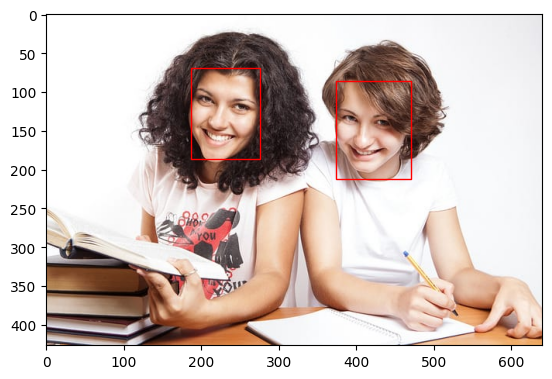

In [16]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
 # load the image
 data = pyplot.imread(filename)
 # plot the image
 pyplot.imshow(data)
 # get the context for drawing boxes
 ax = pyplot.gca()
 # plot each box
 for result in result_list:
 # get coordinates
     x, y, width, height = result['box']
 # create the shape
     rect = Rectangle((x, y), width, height, fill=False, color='red')
 # draw the box
     ax.add_patch(rect)
 # show the plot
 pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)


3/3 [==============================] - 0s 20ms/step
left_eye (518, 168)
right_eye (532, 170)
nose (525, 178)
mouth_left (515, 182)
mouth_right (529, 184)


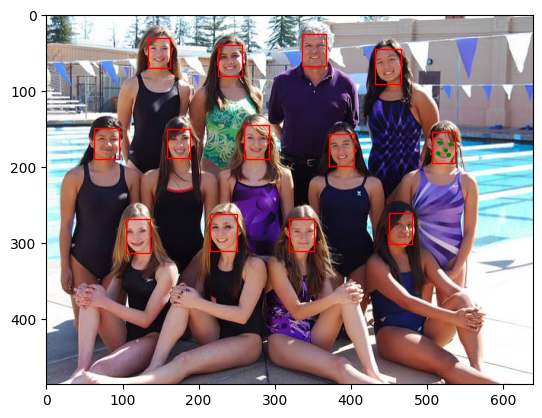

In [34]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
 # load the image
 data = pyplot.imread(filename)
 # plot the image
 pyplot.imshow(data)
 # get the context for drawing boxes
 ax = pyplot.gca()
 # plot each box
 for result in result_list:
 # get coordinates
     x, y, width, height = result['box']
 # create the shape
     rect = Rectangle((x, y), width, height, fill=False, color='red')
 # draw the box
     ax.add_patch(rect)
 # draw the dots
 for key, value in result['keypoints'].items():
     print(key,value)
 # create and draw dot
     dot = Circle(value, radius=2, color='green')
     ax.add_patch(dot)
 # show the plot
 pyplot.show()
 
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)


3/3 [==============================] - 0s 20ms/step


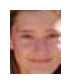

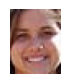

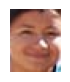

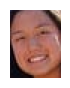

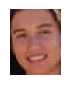

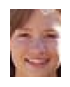

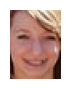

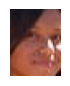

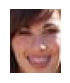

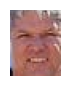

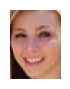

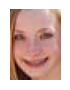

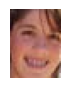

In [57]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN


# draw each face separately
def draw_faces(filename, result_list):
 # load the image
 data = pyplot.imread(filename)
 # plot each face as a subplot
 for i in range(len(result_list)):
 # get coordinates
     fig = pyplot.figure(figsize=(10,7))
     x1, y1, width, height = result_list[i]['box']
     x2, y2 = x1 + width, y1 + height
 # define subplot
     pyplot.subplot(1, len(result_list), i+1)
     pyplot.axis('off')
 # plot face
     pyplot.imshow(data[y1:y2, x1:x2])
 # show the plot
     pyplot.show()
     image_name = "{}.jpg".format(i)
     fig.savefig(image_name)
 
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)

# display faces on the original image
draw_faces(filename, faces)
